In [1]:
pip install openpyxl xlrd


     ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("tweet1.csv")
df.head().shape,df.shape

((5, 1), (983, 1))

In [4]:
df.head()

,Text
0,serius tanya stb kalau gabisa dipake tu kenapa...
1,kominfo bentuk satgas kecil kendali harga stb ...
2,kominfo sinergi bentuk satgas kecil kendali ha...
3,masyarakat tahu stb gratis bagi untuk masyarak...
4,stb gratis bagi siap syarat login link cek pen...


In [5]:
def remove_whitespace(tweet):
    return ' '.join(tweet.split())

def tokenizing(tweet):
    tokens = word_tokenize(remove_whitespace(tweet))
    return ' ', join(tokens)
df['Tokens']= df['Text'].apply(lambda X: X.split())

In [6]:
df.head()

,Text,Tokens
0,serius tanya stb kalau gabisa dipake tu kenapa...,"[serius, tanya, stb, kalau, gabisa, dipake, tu..."
1,kominfo bentuk satgas kecil kendali harga stb ...,"[kominfo, bentuk, satgas, kecil, kendali, harg..."
2,kominfo sinergi bentuk satgas kecil kendali ha...,"[kominfo, sinergi, bentuk, satgas, kecil, kend..."
3,masyarakat tahu stb gratis bagi untuk masyarak...,"[masyarakat, tahu, stb, gratis, bagi, untuk, m..."
4,stb gratis bagi siap syarat login link cek pen...,"[stb, gratis, bagi, siap, syarat, login, link,..."


In [7]:
lexicon_positive = dict()
import csv
with open('positive.csv','r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
        
lexicon_negative = dict()
import csv
with open('negative.csv','r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
#function to determine sentiment polarity of tweet
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if(word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity =''
    if (score >= 0):
        polarity = 'Positif'
    elif (score < 0):
        polarity = 'Negatif'
    return score, polarity

In [8]:
results = df['Tokens'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['sentimen'] = results[1]
print(df['sentimen'].value_counts())

Negatif    545
Positif    438
Name: sentimen, dtype: int64


In [9]:
df = df[['Text', 'polarity_score', 'sentimen']]
df.head()

,Text,polarity_score,sentimen
0,serius tanya stb kalau gabisa dipake tu kenapa...,-16,Negatif
1,kominfo bentuk satgas kecil kendali harga stb ...,7,Positif
2,kominfo sinergi bentuk satgas kecil kendali ha...,4,Positif
3,masyarakat tahu stb gratis bagi untuk masyarak...,-10,Negatif
4,stb gratis bagi siap syarat login link cek pen...,-1,Negatif


<Axes: >

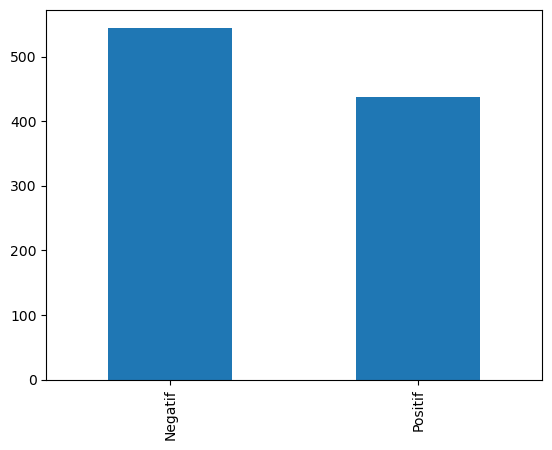

In [10]:
df['sentimen'].value_counts().plot(kind='bar')

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_negative = df[ (df['sentimen']== "Negatif")]
df_positif = df[ (df['sentimen']== "Positif")]
#convert to list
negative_list=df_negative['Text'].tolist()
Positif_list=df_positif['Text'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positif = ("").join(str(Positif_list))
filtered_positif = filtered_positif.lower()

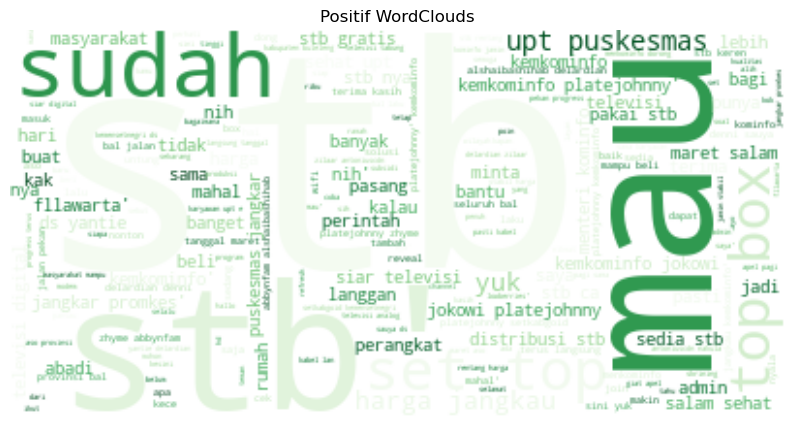

In [95]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color="white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positif WordClouds")
plt.show()

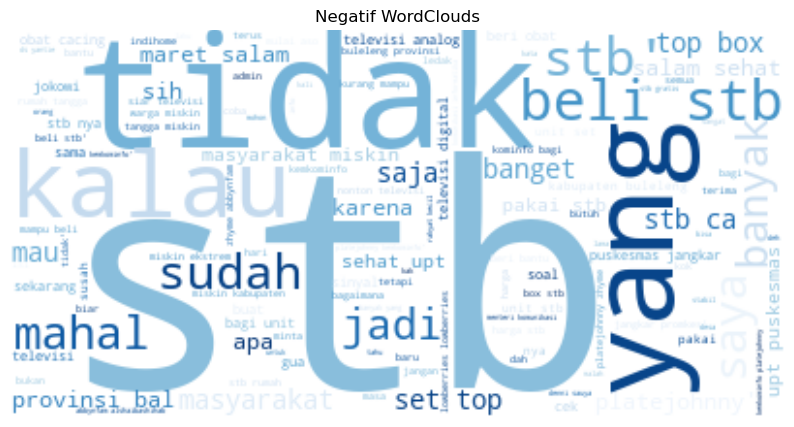

In [96]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color="white", colormap="Blues").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif WordClouds")
plt.show()

In [11]:
df = df[['Text', 'polarity_score', 'sentimen']]
df.to_excel("polarity2.xlsx", index=False)